In [3]:
import pandas as pd
df = pd.read_csv('/content/database.csv')
df.sample(100)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
10106,08/03/1990,09:15:06,47.963,84.961,Earthquake,33.4,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,1.00,USP0004CX1,US,US,NC,Reviewed
20509,03/11/2011,06:06:13,39.003,142.290,Earthquake,42.7,3.5,304.0,6.3,MB,...,188.0,27.6,NaN,NaN,0.71,USP000HVP3,US,US,US,Reviewed
12594,08/11/1995,09:19:22,-23.199,170.813,Earthquake,15.9,NaN,NaN,5.5,MW,...,NaN,NaN,NaN,NaN,0.90,USP00071Q9,US,US,HRV,Reviewed
8808,12/27/1987,03:05:05,49.864,78.758,Nuclear Explosion,0.0,NaN,NaN,6.1,MB,...,131.0,NaN,NaN,NaN,0.80,USP0003BKH,US,US,US,Reviewed
4704,03/07/1978,02:48:39,31.962,137.610,Earthquake,442.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000T8Y,US,US,US,Reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,08/22/1985,19:29:58,-22.364,-174.733,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002J0Z,US,US,HRV,Reviewed
416,04/21/1966,15:45:21,35.581,142.171,Earthquake,10.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM848596,ISCGEM,ISCGEM,ISCGEM,Automatic
11187,11/04/1992,18:13:13,-14.238,167.641,Earthquake,14.1,NaN,NaN,6.4,MW,...,NaN,NaN,NaN,NaN,1.10,USP0005G9V,US,US,HRV,Reviewed
2631,03/03/1973,02:42:09,50.439,156.278,Earthquake,59.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP00000T9,US,US,US,Reviewed


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

### Dataframe Features Explanation
- Temporal Features
  - `Date`: The calendar date on which the earthquake occurred (format: MM/DD/YYYY). Useful for time-series or temporal analysis.

  - `Time`: The exact time of the event’s origin (format: HH:MM:SS, likely UTC or a specified timezone).

- Geographic Features
  - `Latitude`: Percent distance N(+)/S(-) from the equator (degrees); locates the epicenter’s north-south position.

  - `Longitude`: Percent distance E(+)/W(-) from the Prime Meridian (degrees); locates the epicenter’s east-west position.

- Event Classification
  - `Type`: Classification of the event (e.g., Earthquake, Quake, Explosion). Helps filter for event type.

- Event Depth and Quality Metrics
  - `Depth`: Focal depth below earth’s surface where the event started (kilometers). Deeper earthquakes often have less surface impact.

  - `Depth Error`: Uncertainty (± km) in depth measurement—if precise instruments are available, this is smaller.

  - `Depth Seismic Stations`: The count of seismic stations contributing to the depth estimation (higher = potentially more reliable).

- Magnitude and Associated Uncertainty
  - `Magnitude`: The calculated size or strength of the earthquake (commonly Moment Magnitude, Mw, or Richter).

  - `Magnitude Type`: The chosen system for magnitude (e.g., “ML”, “MB”, “MW”, “MWC”).

  - `Magnitude Error`: Uncertainty (± units) in the reported magnitude. Smaller means higher precision.

  - `Magnitude Seismic Stations`: Number of seismic stations that contributed to the magnitude estimate.

- Location Reliability
  - `Azimuthal Gap`: The largest angle between nearest stations (degrees). A lower gap generally means better coverage and location reliability.

  - `Horizontal Distance`: Additional horizontal metric (if applicable, in kilometers); often used for detailed geophysical assessments.

  - `Horizontal Error`: Location uncertainty (± km) in the epicenter’s horizontal (lat/lon) coordinates.

- Fit and Quality
  - `Root Mean Square`: RMS of travel time residuals (seconds), reflecting the fit between observed and modeled arrival times. Lower is usually better.

- Identifiers and Source Tracking
  - `ID`: Unique identifier assigned to each event for external reference or cross-dataset matching.

  - `Source`: Primary agency or catalog providing the event—e.g., “US” for USGS, “ISCGEM” for ISC.

  - `Location Source`: Agency or process that determined the event’s geographic origin.

  - `Magnitude Source`: Agency or process that determined the event’s magnitude.

- Data Review Status
  - `Status`: Indicates if the event information has been “Reviewed” (human-checked and validated), or is “Automatic” (algorithm-assigned, not manually checked)

In [7]:
df.isnull().sum()

,0
Date,0
Time,0
Latitude,0
Longitude,0
Type,0
Depth,0
Depth Error,18951
Depth Seismic Stations,16315
Magnitude,0
Magnitude Type,3


In [8]:
df.shape

(23412, 21)

In [9]:
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.00
Time,0.00
Latitude,0.00
Longitude,0.00
Type,0.00
Depth,0.00
Depth Error,80.95
Depth Seismic Stations,69.69
Magnitude,0.00
Magnitude Type,0.01


In [10]:
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.00
Time,0.00
Latitude,0.00
Longitude,0.00
Type,0.00
Depth,0.00
Depth Error,80.95
Depth Seismic Stations,69.69
Magnitude,0.00
Magnitude Type,0.01


In [11]:
# Drop columns with more than 30% missing values
df.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Magnitude Error', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'ID'],axis=1,inplace=True)

In [12]:
# Check remaining missing values
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.00
Time,0.00
Latitude,0.00
Longitude,0.00
Type,0.00
Depth,0.00
Magnitude,0.00
Magnitude Type,0.01
Root Mean Square,25.88
Source,0.00


- For `Magnitude Type`, the most frequent category is used to fill missing entries because it’s categorical and this preserves distribution.

- For `Root Mean Square`, the median is used for numeric imputation to reduce the influence of outliers.

In [13]:
# Fill missing values in 'Magnitude Type' with the mode (most frequent value)
magnitude_type_mode = df['Magnitude Type'].mode()[0]
df['Magnitude Type'].fillna(magnitude_type_mode, inplace=True)

# Fill missing values in 'Root Mean Square' with the median value
rms_median = df['Root Mean Square'].median()
df['Root Mean Square'].fillna(rms_median, inplace=True)


/tmp/ipython-input-3363967381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Magnitude Type'].fillna(magnitude_type_mode, inplace=True)
/tmp/ipython-input-3363967381.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [14]:
# Check remaining missing values
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.0
Time,0.0
Latitude,0.0
Longitude,0.0
Type,0.0
Depth,0.0
Magnitude,0.0
Magnitude Type,0.0
Root Mean Square,0.0
Source,0.0


### Feature Engineering and Transforming the `Date` and `Time` features.

- Create a unified `Datetime` feature from `Date` and `Time`.

- Extracts components like `Year`, `Month`, `Day`, `Hour`, `Minute`, `Second`, and `Day of Week`.

- Applies cyclical sine-cosine encoding for `Month`, `Hour`, and `DayOfWeek` to capture their periodic nature.

- These engineered features help machine learning models learn temporal patterns in earthquake occurrences more effectively.

In [16]:
# Combine Date and Time into a single datetime column
import numpy as np
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Extract temporal features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical encoding for Month, Hour, DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop original Date, Time, and intermediate columns
df.drop(['Date', 'Time', 'Datetime', 'Month', 'Hour', 'DayOfWeek'], axis=1, inplace=True)
# Check the transformed dataframe
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,...,Year,Day,Minute,Second,Month_sin,Month_cos,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,2.0,44.0,18.0,0.5,0.866025,-0.258819,-9.659258e-01,-0.974928,-0.222521
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,4.0,29.0,49.0,0.5,0.866025,0.258819,-9.659258e-01,0.000000,1.000000
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,5.0,5.0,58.0,0.5,0.866025,-1.000000,-1.836970e-16,0.781831,0.623490
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,8.0,49.0,43.0,0.5,0.866025,-1.000000,-1.836970e-16,-0.433884,-0.900969
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,9.0,32.0,50.0,0.5,0.866025,-0.258819,-9.659258e-01,-0.974928,-0.222521


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Root Mean Square  23412 non-null  float64
 7   Source            23412 non-null  object 
 8   Location Source   23412 non-null  object 
 9   Magnitude Source  23412 non-null  object 
 10  Status            23412 non-null  object 
 11  Year              23409 non-null  float64
 12  Day               23409 non-null  float64
 13  Minute            23409 non-null  float64
 14  Second            23409 non-null  float64
 15  Month_sin         23409 non-null  float64
 16  Month_cos         23409 non-null  float6

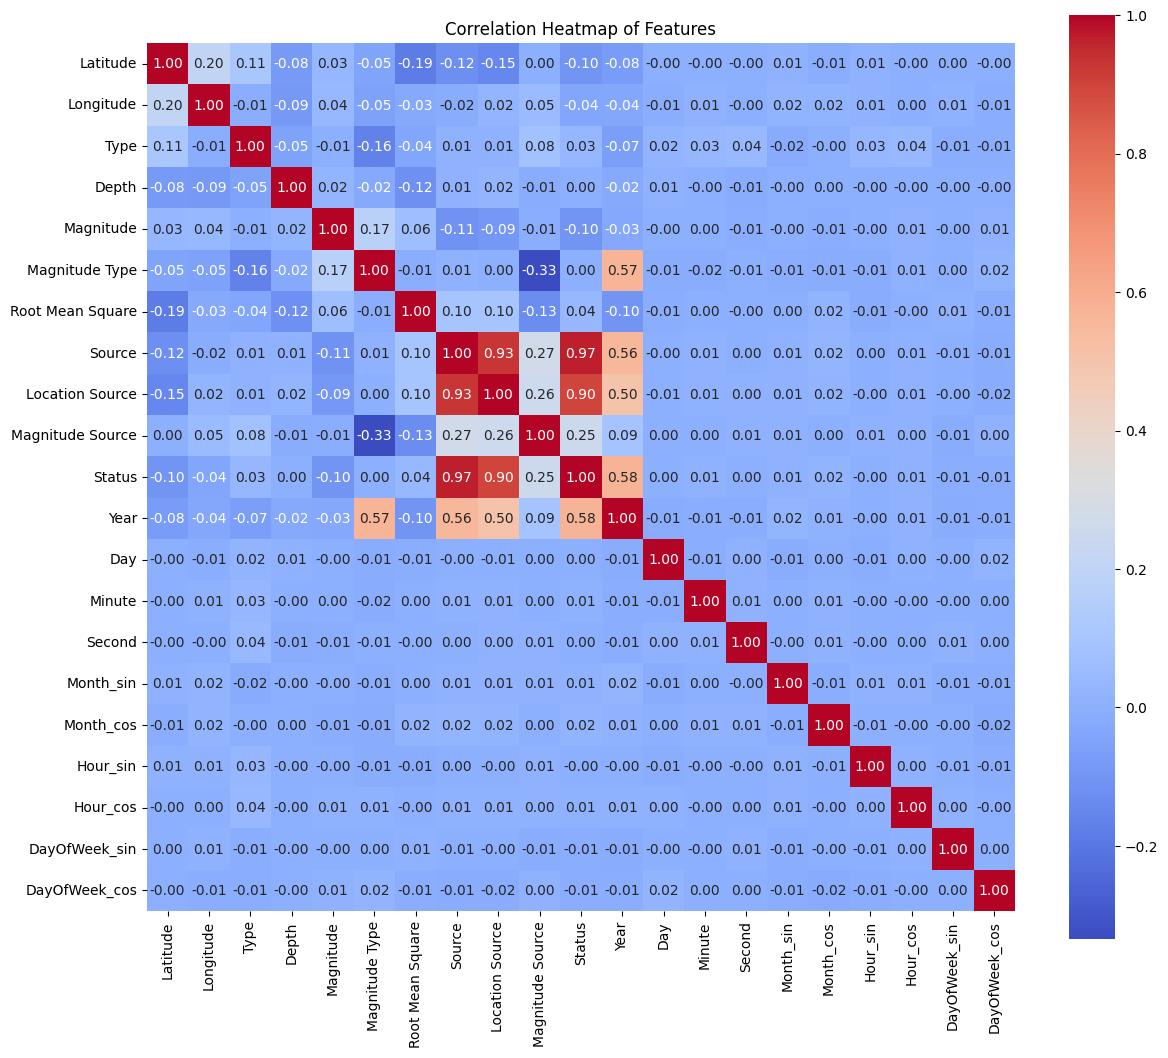

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric codes temporarily for correlation
categorical_cols = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']
df_corr = df.copy()
for col in categorical_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()


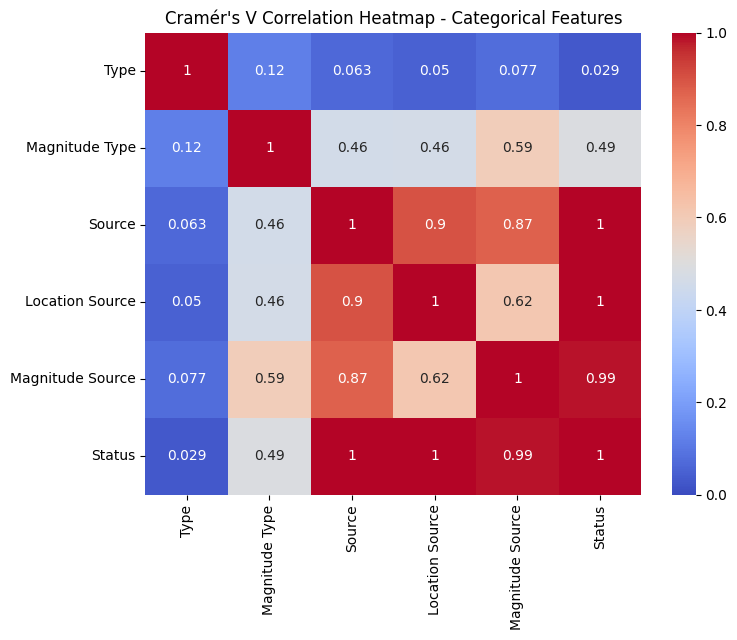

In [19]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Function to compute Cramér's V correlation between two categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select categorical columns
categorical_cols = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']

# Create empty DataFrame for Cramér's V values
cramers_results = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                              index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V for each pair
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap - Categorical Features")
plt.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Root Mean Square  23412 non-null  float64
 7   Source            23412 non-null  object 
 8   Location Source   23412 non-null  object 
 9   Magnitude Source  23412 non-null  object 
 10  Status            23412 non-null  object 
 11  Year              23409 non-null  float64
 12  Day               23409 non-null  float64
 13  Minute            23409 non-null  float64
 14  Second            23409 non-null  float64
 15  Month_sin         23409 non-null  float64
 16  Month_cos         23409 non-null  float6

In [22]:
df.drop(['Minute', 'Second', 'DayOfWeek_sin','DayOfWeek_cos','Location Source', 'Magnitude Source'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Root Mean Square  23412 non-null  float64
 7   Source            23412 non-null  object 
 8   Status            23412 non-null  object 
 9   Year              23409 non-null  float64
 10  Day               23409 non-null  float64
 11  Month_sin         23409 non-null  float64
 12  Month_cos         23409 non-null  float64
 13  Hour_sin          23409 non-null  float64
 14  Hour_cos          23409 non-null  float64
dtypes: float64(11), object(4)
memory usage: 2.7+ MB


In [21]:
round(df['Source'].value_counts()*100/df.shape[0],2)

,count
Source,
US,88.12
ISCGEM,10.51
ISCGEMSUP,0.51
CI,0.26
GCMT,0.23
NC,0.22
AK,0.05
OFFICIAL,0.03
UW,0.03


### Encoding the Categorical Features

In [24]:
from sklearn.preprocessing import OneHotEncoder
# List of categorical features
categorical_features = ['Type', 'Magnitude Type', 'Source', 'Status']

# Initialize OneHotEncoder (drop='first' to avoid multicollinearity, handle_unknown='ignore' to manage unseen categories)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_array = encoder.fit_transform(df[categorical_features])

# Get feature names for encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Concatenate the encoded DataFrame to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                23412 non-null  float64
 1   Longitude               23412 non-null  float64
 2   Type                    23412 non-null  object 
 3   Depth                   23412 non-null  float64
 4   Magnitude               23412 non-null  float64
 5   Magnitude Type          23412 non-null  object 
 6   Root Mean Square        23412 non-null  float64
 7   Source                  23412 non-null  object 
 8   Status                  23412 non-null  object 
 9   Year                    23409 non-null  float64
 10  Day                     23409 non-null  float64
 11  Month_sin               23409 non-null  float64
 12  Month_cos               23409 non-null  float64
 13  Hour_sin                23409 non-null  float64
 14  Hour_cos                23409 non-null

### Scaling the Numerical Features

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List numeric columns to scale/normalize (bool columns excluded)
numeric_features = ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Root Mean Square', 'Year', 'Day',
                    'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos']

# Standard Scaling (z-score normalization)
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Alternatively, for Min-Max Normalization (uncomment below)
# normalizer = MinMaxScaler()
# df[numeric_features] = normalizer.fit_transform(df[numeric_features])



In [27]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status,Year,...,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Status_Reviewed
0,0.583377,0.844368,Earthquake,0.495984,0.277668,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006109,0.698849,Earthquake,0.075272,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739162,-1.701962,Earthquake,-0.413928,0.750418,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.017599,-0.503524,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.340688,0.691479,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Type,0
Depth,0
Magnitude,0
Magnitude Type,0
Root Mean Square,0
Source,0
Status,0
Year,3


In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Type,0
Depth,0
Magnitude,0
Magnitude Type,0
Root Mean Square,0
Source,0
Status,0
Year,0


In [31]:
df.to_csv('preprocessed_earthquake_data.csv', index=False)